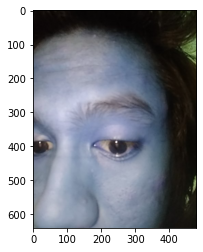

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

image_path = "./test/testfix_4.jpeg"

img = cv2.imread(image_path)

plt.imshow(img)
plt.show()

In [2]:
def brightness_settings(img, brightness=255) :
    if brightness != 0 :
        if brightness > 0 :
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow) / 255
        gamma_b = shadow
        buf = cv2.addWeighted(img, alpha_b, img, 0, gamma_b)
    else :
        buf = img.copy()
        
    return buf

def contrast_settings(img, contrast=127):
    if contrast != 0 :
        f = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        alpha_c = f
        gamma_c = 127 * (1 - f)
        buf = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)
    else :
        buf = img.copy()
    
    return buf

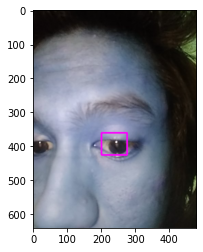

y:400
y1:360
y2:425
x:240
x1:200
x2:275


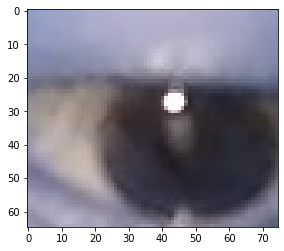

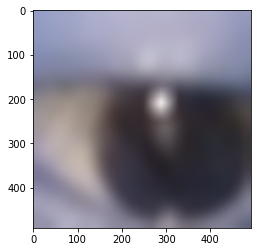

In [3]:
img_test = img.copy();

#cv2.circle(img_test, (int(img.shape[1]/2), int(img.shape[0]/2)), 10, (255, 0, 255), 3)
#cv2.circle(img_test, (int(img.shape[1]/2), int(img.shape[0]/1.6)), 50, (255, 0, 255), 3)


y1 = int(img.shape[0]/1.6) - 40
y2 = int(img.shape[0]/1.6) + 25

x1 = int(img.shape[1]/2) - 40
x2 = int(img.shape[1]/2) + 35

cv2.rectangle(img_test, pt1=(x1,y1), pt2=(x2,y2), color=(255, 0, 255), thickness=3)
plt.imshow(img_test)
plt.show()

print("y:" + str(int(img.shape[0]/1.6)))
print("y1:" + str(y1))
print("y2:" + str(y2))

print("x:" + str(int(img.shape[1]/2)))
print("x1:" + str(x1))
print("x2:" + str(x2))

cropped_img = img[y1:y2, x1:x2]
plt.imshow(cropped_img)
plt.show()

img_phone = cv2.resize(cropped_img, (491, 491), interpolation = cv2.INTER_AREA)
img_phone = cv2.blur(img_phone, (40, 40))

plt.imshow(img_phone)
plt.show()

In [4]:
img_r, img_g, img_b, _ = cv2.mean(img_phone)
img_bright = (img_r + img_b + img_g) / 3
print(img_bright)

canny_1 = 50 
canny_2 = 60

if img_bright > 60 :
    print("light") 
else :
    print("dark")
    img_phone = brightness_settings(img_phone, 50)
    canny_1 = 20 
    canny_2 = 20

original_img = img_phone.copy()
img_phone = contrast_settings(img_phone, 90)
#original_img = img_phone.copy()

119.39066676068762
light


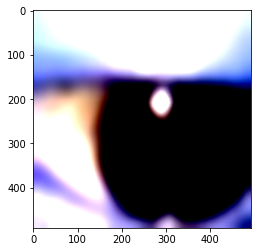

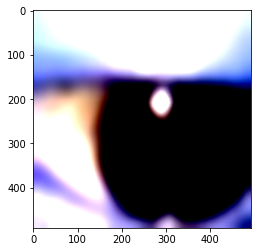

In [5]:
plt.imshow(img_phone)
plt.show()

plt.imshow(img_phone)
plt.show()

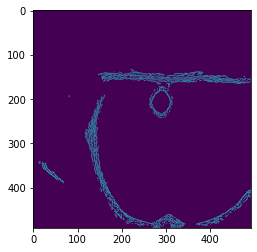

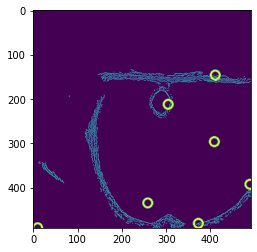

In [6]:
#Hough Transform to detect the iris
input_img = img_phone.copy()
real_img = input_img.copy()
#level = calculateBrightness(input_img)

preprocessing = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)
preprocessing = cv2.medianBlur(preprocessing, 7)
ret, line = cv2.threshold(preprocessing, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#preprocessing = cv2.Canny(preprocessing, 20, 30, apertureSize=3)
preprocessing = cv2.Canny(preprocessing, canny_1, canny_2, apertureSize=3)

#preprocessing = cv2.Canny(line,0,0)

plt.imshow(preprocessing)
plt.show()

rows = preprocessing.shape[0]
circles = cv2.HoughCircles(preprocessing, cv2.HOUGH_GRADIENT, 1, rows / 4, param1=ret, param2=10, minRadius=int(real_img.shape[0]/2), maxRadius=real_img.shape[0] - 150)

img_center = (int(real_img.shape[0]/2),int(real_img.shape[1] /2))
img_radius = int(real_img.shape[0])

x = []
test = preprocessing.copy()
if circles is not None :
    circles = np.uint16(np.around(circles))
    begin = True
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        
        distance_center = int(math.sqrt((i[0] + img_radius/2)**2 + (i[1] + img_radius/2)**2))
        #print(distance_center)
        
        cv2.circle(test, center, 10, (255, 0, 255), 3)
        #cv2.circle(test, center, radius, (255, 0, 255), 3)
        x.append(center)

plt.imshow(test)
plt.show()

260
7
[(372, 480), (408, 296), (304, 212), (258, 434), (488, 392), (410, 146), (10, 490)]
5
[[372 480]
 [408 296]
 [304 212]
 [258 434]
 [488 392]]
245.5


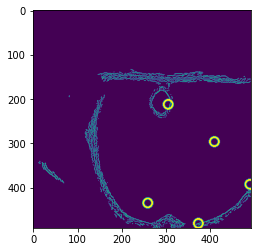

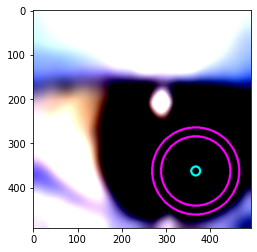

In [7]:
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import KMeans
from scipy import stats

if len(circles) < 1 :
    pass

print(radius)
print(len(x))
print(x)

test_img = preprocessing.copy()

for a in x :
    cv2.circle(test_img, (a[0], a[1]), 20, (255, 255, 0), 3)

z = np.abs(stats.zscore(x))
x_o = np.array(x)[(z < 1.3).all(axis=1)]
print(len(x_o))
print(x_o)


if(len(x_o) == 0) :
    x_o = x
    
for a in x_o :
    cv2.circle(preprocessing, (a[0], a[1]), 10, (255, 255, 0), 3)

print(real_img.shape[0]/2)

clf = KMeans(n_clusters=1, random_state=0).fit(x_o)
cluster_center = (int(clf.cluster_centers_[0][0]) ,int(clf.cluster_centers_[0][1]))

cv2.circle(real_img, cluster_center, 10, (0, 255, 255), 3)

radius = int(real_img.shape[0]/ 2)
#radius = int(real_img.shape[0]/ 2 * 7 / 10)
radius = radius

#cv2.circle(preprocessing, cluster_center, int(radius * 0.9), (255, 0, 255), 3)
cv2.circle(real_img, cluster_center, int(radius * 0.4), (255, 0, 255), 3)

#cv2.circle(preprocessing, cluster_center, int(radius * 0.8), (255, 0, 255), 3)
cv2.circle(real_img, cluster_center, int(radius * 0.4 * 0.8), (255, 0, 255), 3)


plt.imshow(preprocessing)
plt.show()

plt.imshow(real_img)
plt.show()

In [8]:
def rubberSheetModel(image, height, width, r_in, r_out, center):
    thetas = np.arange(0, 2 * np.pi, 2 * np.pi / width)  # Theta values
    #r_out = r_in + r_out
    # Create empty flatten image
    flat = np.zeros((height,width, 3), np.uint8)
    #circle_x = int(image.shape[0] / 2)
    #circle_y = int(image.shape[1] / 2)
    circle_x = int(center[0])
    circle_y = int(center[1])
    
    for i in range(width):
        for j in range(height):
            theta = thetas[i]  # value of theta coordinate
            r_pro = j / height  # value of r coordinate(normalized)

            # get coordinate of boundaries
            Xi = circle_x + r_in * np.cos(theta)
            Yi = circle_y + r_in * np.sin(theta)
            
            Xo = circle_x + r_out * np.cos(theta)
            Yo = circle_y + r_out * np.sin(theta)

            # the matched cartesian coordinates for the polar coordinates
            Xc = (1 - r_pro) * Xi + r_pro * Xo
            Yc = (1 - r_pro) * Yi + r_pro * Yo
            
            #if(Xc > width):
                #Xc = width - 1
            
            if Xc >= image.shape[0] :
                Xc = image.shape[0] - 1
                
            #if(Yc > height):
            #    Yc = height - 1
            
            if Yc >= image.shape[1] :
                Yc = image.shape[1] - 1
            
            color = image[int(Xc)][int(Yc)]  # color of the pixel

            flat[j][i] = color
    
    return flat

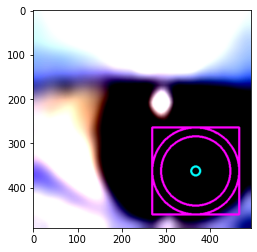

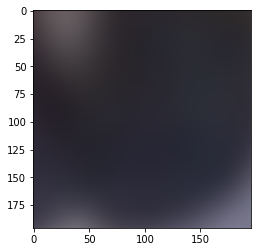

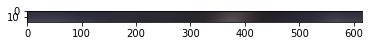

54.0


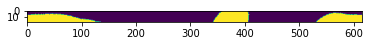

In [9]:
r_in = int(radius * 0.4 * 0.8)
r_out = int(radius * 0.4)

h = int(r_out - r_in)
w = int(r_out * 2 * np.pi)

rx_1 = int(cluster_center[0] - r_out)
rx_2 = int(cluster_center[0] + r_out)

ry_1 = int(cluster_center[1] - r_out)
ry_2 = int(cluster_center[1] + r_out)

cv2.rectangle(real_img, pt1=(rx_1,ry_1), pt2=(rx_2,ry_2), color=(255, 0, 255), thickness=3)
plt.imshow(real_img)
plt.show()

cropped_img = original_img[ry_1:ry_2, rx_1:rx_2] 
plt.imshow(cropped_img)
plt.show()
cropped_center = [int(cropped_img.shape[0]/2), int(cropped_img.shape[1]/2)]

fin_img = rubberSheetModel(cropped_img, h, w, r_in, r_out, cropped_center)

plt.imshow(fin_img)
plt.show()

#Preprocess Image
fin_img = cv2.cvtColor(fin_img, cv2.COLOR_BGR2GRAY)

otsu_threshold, image_result = cv2.threshold(fin_img, 0, 255, cv2.THRESH_OTSU)
histr = cv2.calcHist([image_result],[0],None,[256],[0,256])

print(otsu_threshold)

plt.imshow(image_result)
plt.show()